In [121]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import spacy

In [122]:
import spacy

nlp = spacy.load("en_core_web_sm")

def spacy_tokenizer(document):
    tokens = nlp(document)

    return [token.lemma_ for token in tokens if not token.is_stop and not token.is_punct]


In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

pipeline=Pipeline([
    ('vct',CountVectorizer(tokenizer=spacy_tokenizer)),
    ('clf',MultinomialNB())
])


In [124]:
data=pd.read_csv("df_file.csv")
data.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [125]:
y=data['Label']
X=data['Text']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [127]:
pipeline.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vct',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x3271b3740>)),
                ('clf', MultinomialNB())])

In [128]:
y_pred = pipeline.predict(X_test)

In [130]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9865470852017937
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       1.00      1.00      1.00        48
           2       0.98      0.98      0.98        50
           3       0.97      1.00      0.98        32
           4       0.98      0.98      0.98        52

    accuracy                           0.99       223
   macro avg       0.99      0.99      0.99       223
weighted avg       0.99      0.99      0.99       223

[[40  0  0  0  1]
 [ 0 48  0  0  0]
 [ 0  0 49  1  0]
 [ 0  0  0 32  0]
 [ 0  0  1  0 51]]


<Axes: >

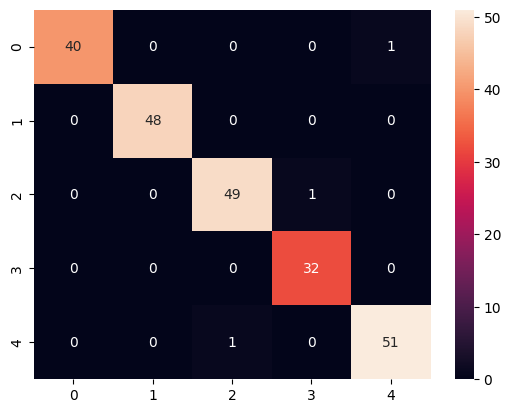

In [133]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [135]:
from joblib import load

model=load("model.joblib")

In [137]:
predictions=model.predict(X_test)

In [138]:
predictions

array([2, 2, 4, 2, 3, 3, 3, 2, 0, 4, 1, 1, 2, 0, 1, 2, 0, 0, 4, 3, 2, 2,
       1, 1, 2, 2, 2, 2, 4, 2, 1, 4, 4, 1, 3, 3, 3, 2, 0, 1, 1, 0, 0, 0,
       4, 4, 4, 4, 0, 2, 4, 0, 4, 3, 4, 4, 0, 0, 4, 0, 2, 2, 3, 3, 1, 1,
       1, 2, 2, 1, 4, 1, 3, 0, 1, 4, 4, 0, 1, 4, 1, 2, 0, 0, 0, 3, 0, 0,
       2, 0, 2, 0, 4, 1, 1, 1, 1, 4, 2, 2, 2, 4, 2, 4, 0, 4, 4, 3, 1, 3,
       0, 4, 0, 0, 3, 4, 4, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 3, 1, 3, 2,
       1, 2, 4, 3, 1, 4, 2, 1, 3, 3, 4, 2, 0, 4, 2, 0, 2, 2, 0, 2, 1, 1,
       4, 0, 4, 0, 3, 4, 4, 4, 4, 1, 3, 3, 3, 1, 2, 1, 0, 2, 1, 1, 1, 2,
       1, 3, 3, 3, 1, 2, 2, 4, 4, 0, 0, 4, 3, 2, 4, 4, 1, 1, 1, 0, 0, 4,
       3, 4, 1, 4, 2, 4, 1, 3, 4, 3, 1, 2, 4, 3, 4, 1, 0, 0, 4, 2, 2, 1,
       3, 2, 4])

In [140]:
y_test.values

array([2, 2, 4, 2, 3, 3, 3, 2, 0, 4, 1, 1, 2, 0, 1, 2, 0, 0, 4, 3, 2, 2,
       1, 1, 2, 2, 2, 2, 4, 2, 1, 4, 4, 1, 3, 3, 3, 2, 0, 1, 1, 0, 0, 0,
       4, 4, 4, 4, 0, 2, 4, 0, 4, 3, 4, 4, 0, 0, 4, 0, 2, 2, 3, 3, 1, 1,
       1, 2, 2, 1, 4, 1, 2, 0, 1, 4, 4, 0, 1, 4, 1, 2, 0, 0, 0, 3, 0, 0,
       2, 0, 2, 0, 4, 1, 1, 1, 1, 4, 2, 2, 2, 4, 2, 4, 0, 4, 4, 3, 1, 3,
       0, 4, 0, 0, 3, 4, 4, 0, 1, 1, 2, 1, 4, 2, 2, 1, 2, 0, 3, 1, 3, 2,
       1, 2, 4, 3, 1, 4, 2, 1, 3, 3, 4, 2, 0, 4, 2, 0, 2, 2, 0, 2, 1, 1,
       4, 0, 4, 0, 3, 4, 4, 4, 4, 1, 3, 3, 3, 1, 2, 1, 0, 2, 1, 1, 1, 2,
       1, 3, 3, 3, 1, 2, 2, 4, 4, 0, 0, 0, 3, 2, 4, 4, 1, 1, 1, 0, 0, 4,
       3, 4, 1, 4, 2, 4, 1, 3, 4, 3, 1, 2, 4, 3, 4, 1, 0, 0, 4, 2, 2, 1,
       3, 2, 4])